In [7]:
from src.model.pl_modules import RacingF1Detector
from src.data.datasets import RacingF1Dataset
from src.data.pl_data_modules import RacingF1DataModule
from src.data.custom_transforms import CustomRescale
from pytorch_lightning import Trainer
from src.utils import draw_bounding_box, tensor_to_image
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader
from torchvision import transforms

import torch
import torchvision
import pytorch_lightning as pl

In [8]:
augmentation = transforms.Compose([
	CustomRescale((350, 350)),
])

batch_size = 32

data_module = RacingF1DataModule.from_directories(batch_size, "dataset", data_transform=augmentation)

data_module.setup()

In [9]:
trainset = data_module.train_dataset

sample = trainset[432]
image = tensor_to_image(sample['img'])
image_with_bounding_box = draw_bounding_box(image, sample['bounding_box'])

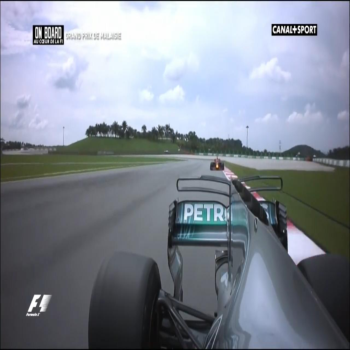

In [10]:
image


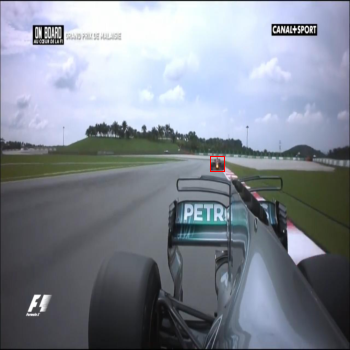

In [11]:
image_with_bounding_box

In [ ]:
hparams = { }
detector = RacingF1Detector(hparams)

In [ ]:
logger = TensorBoardLogger('tb_logs', name='racing_detector')

In [ ]:
trainer = Trainer(gpus=0, max_epochs=1, logger=logger)

In [ ]:
trainer.fit(detector, datamodule=data_module)